In [17]:
import os
os.chdir(os.getcwd() + '/..')

In [18]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [110]:
from iss.tools import Config
from iss.tools import Tools
from iss.models import SimpleAutoEncoder
from iss.models import SimpleConvAutoEncoder
from iss.models import VarAutoEncoder
from iss.models import VarConvAutoEncoder
from iss.models.ModelTrainer import ModelTrainer
import pandas as pd
import datetime as dt
import time
import numpy as np
from dotenv import find_dotenv, load_dotenv

In [20]:
load_dotenv(find_dotenv())
cfg = Config(project_dir = os.getenv("PROJECT_DIR"), mode = os.getenv("MODE"))
model_type = 'simple_conv'

## Model

In [82]:
# model = VarAutoEncoder(cfg.get('models')[model_type])
model = SimpleConvAutoEncoder(cfg.get('models')[model_type])

In [23]:
model.model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 27, 48, 3)         0         
_________________________________________________________________
encoder (Model)              (None, 3, 6, 16)          25328     
_________________________________________________________________
decoder (Model)              (None, 27, 48, 3)         13468463  
Total params: 13,493,791
Trainable params: 13,493,337
Non-trainable params: 454
_________________________________________________________________


In [24]:
model.encoder_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 27, 48, 3)         0         
_________________________________________________________________
enc_conv_1 (Conv2D)          (None, 27, 48, 64)        1792      
_________________________________________________________________
batch_normalization_8 (Batch (None, 27, 48, 64)        256       
_________________________________________________________________
activation_7 (Activation)    (None, 27, 48, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 24, 64)        0         
_________________________________________________________________
enc_conv_2 (Conv2D)          (None, 13, 24, 32)        18464     
_________________________________________________________________
batch_normalization_9 (Batch (None, 13, 24, 32)        128       
__________

In [25]:
model.save()

## Collection Manager

In [26]:
from iss.data.CollectionManager import CollectionManagerFromDirectory

In [27]:
collection = CollectionManagerFromDirectory(config = cfg)

## Data Loader

In [67]:
from iss.models.DataLoader import ImageDataGeneratorWrapper

In [72]:
data_loader = ImageDataGeneratorWrapper(cfg, model = model_type)

Found 9537 images belonging to 1 classes.
Found 2725 images belonging to 1 classes.


10911744

In [115]:
preds.shape

(9472, 3, 6, 16)

## Model Trainer

In [31]:
trainer2 = ModelTrainer(model, data_loader, cfg.get('models')[model_type], callbacks=[])

In [15]:
trainer2.callbacks

In [16]:
trainer2.train()

2.2.4
Epoch 1/3
20/20 [==============================] - 66s 3s/step - loss: 0.5066 - val_loss: 0.6479
ok


Epoch 2/3
20/20 [==============================] - 48s 2s/step - loss: 0.4333 - val_loss: 0.5987
ok


Epoch 3/3
20/20 [==============================] - 48s 2s/step - loss: 0.4231 - val_loss: 0.4515
ok


### Prediction

In [32]:
from iss.tools.tools import Tools 

In [33]:
sample = data_loader.get_test_generator().next()[0][1]

In [34]:
prediction = model.predict_one(x = sample)

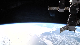

In [35]:
Tools.display_one_picture_scaled(sample)

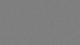

In [36]:
Tools.display_index_picture_scaled(prediction)

In [38]:
sample*255

array([[[   2.        ,    2.        ,    2.        ],
        [   2.        ,    2.        ,    2.        ],
        [   2.        ,    2.        ,    2.        ],
        ..., 
        [  23.        ,   23.        ,   23.        ],
        [  27.00000191,   21.        ,   21.        ],
        [  76.        ,   71.        ,   75.        ]],

       [[   2.        ,    2.        ,    2.        ],
        [   2.        ,    2.        ,    2.        ],
        [   2.        ,    2.        ,    2.        ],
        ..., 
        [  65.        ,   59.00000381,   59.00000381],
        [  72.        ,   67.        ,   71.        ],
        [  91.        ,   89.        ,   92.        ]],

       [[   2.        ,    2.        ,    2.        ],
        [   3.00000024,    3.00000024,    3.00000024],
        [   2.        ,    2.        ,    2.        ],
        ..., 
        [  74.        ,   64.        ,   65.        ],
        [  66.        ,   56.00000381,   57.00000381],
        [  63.00000